# Hub Bespoke Figures
**First Figure**
Strong inputs to oviIN output strongly to oviIN 

Is there a hub and spoke structure to oviIN's connectome? This part of the notebook is to find out if oviIN's strongest inputs also have oviIN as their strongest output.

One can imagine that oviIN could just be a promiscuous neuron that gets a little bit of input from a lot of things. It could be an afterthought to all of its strongest inputs. One the other hand, its strongest inputs might exist to send strong outputs to oviIN. 

1. Import oviIN_r inputs
2. Find where oviIN ranks in the outputs of each input neuron
3. Create primary, secondary etc groups based on distribution
4. Plot groups

**Second Figure** 
Breakdown of known and unknown celltypes in top ROI of oviIN's inputs
1. Pull Synaptic locations for all bodyIds in the oviIN_r's input connectome
2. Merge with modularity data, drop None Types and group by ROI and celltype
3. Filter and label Unknown
4. Plot outer and inner layers of figure

We used the nomenclature presented in Scheffer et al., "A connectome and analysis of the adult Drosophila central brain"

Written by Dr. Gabrielle J Gutierrez and Rhessa Weber Langstaff


In [2]:
from neuprint import Client

auth_token_file = open("/Users/rweberla/Documents/GitHub/Introductions/flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    np_client.fetch_version()
except:
    np_client = None

In [3]:
# import important stuff here
import numpy as np
import pandas as pd
from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC, fetch_neurons

In [4]:
# load package
import matplotlib
import matplotlib as mpl
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'MacOSX', etc.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
%matplotlib inline

# Turn off all warnings, remove to see them
import warnings
warnings.filterwarnings('ignore')

# Set 'pdf.fonttype' to 42 to keep the text editable after exporting to pdf
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams['font.size'] = 14  # Default text size
plt.rcParams['axes.titlesize'] = 18  # Title size
plt.rcParams['figure.titlesize'] = 18  # Figure title size
plt.rcParams['axes.labelsize'] = 14  # X and Y label size
plt.rcParams['xtick.labelsize'] = 12  # X tick label size
plt.rcParams['ytick.labelsize'] = 12  # Y tick label size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

In [5]:
# body IDs of oviINs from Neuprint
oviINr_bodyID = 423101189
oviINl_bodyID = 485934965

In [6]:
# import modularity data (preprocessed_nodes.csv)
mod = pd.read_csv('modularity_runs/0.0/0-0_98765.txt', header=None, sep=' ', names=['id', '0.0'])    
mod

,id,0.0
0,1003215282,1
1,1005952640,2
2,1006928515,3
3,1007260806,3
4,1008024276,4
...,...,...
1827,987117151,2
1828,987273073,6
1829,988567837,5
1830,988909130,5


The modular dataframe is created using data pulled from neuprint (fetch_neurons). This merges all the information needed about each bodyId onto the modularity data.

In [7]:
ovi_inputs_n, conn = fetch_neurons(mod['id'])
ovi_in_merged = pd.merge(mod, ovi_inputs_n, how='left', left_on='id', right_on='bodyId').drop(columns=['bodyId'])
ovi_in_merged

,id,0.0,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,CL229_R,CL229,100,439,851,439,89,330447753,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",None,"[EPA(R), GOR(R), IB, ICL(R), INP, SCL(R), SMP(...","[GOR(R), IB, ICL(R), INP, SCL(R), SPS(R), VMNP]"
1,1005952640,2,IB058_R,IB058,664,2047,6123,2047,325,1435852519,Traced,False,Roughly traced,PVL20,NaN,None,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",None,"[ATL(R), IB, ICL(R), INP, PLP(R), SPS(R), VLNP...","[ATL(R), IB, ICL(R), INP, PLP(R), SPS(R), VLNP..."
2,1006928515,3,CL300_R,CL300,86,173,636,173,60,222728733,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",None,"[ATL(R), IB, ICL(R), INP, SCL(R), SLP(R), SNP(...","[ATL(R), IB, ICL(R), INP, SCL(R), SLP(R), SNP(..."
3,1007260806,3,CL301_R,CL301,119,226,853,226,87,332246609,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",None,"[GOR(R), IB, ICL(R), INP, PLP(R), SCL(R), SLP(...","[IB, ICL(R), INP, PLP(R), SCL(R), SLP(R), SNP(..."
4,1008024276,4,FB5N_R,FB5N,499,2011,3175,2011,377,1211500058,Traced,False,Roughly traced,AVM08,472.5,"[19178, 29711, 37312]","{'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...",SMPCREFB5_4,"[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,987117151,2,LAL010_R,LAL010,1206,5629,8793,5629,650,2060716216,Traced,False,Roughly traced,ADM03,292.5,"[15520, 32234, 10016]","{'SNP(R)': {'pre': 2, 'post': 82, 'downstream'...",None,"[CRE(-ROB,-RUB)(R), CRE(R), EPA(R), INP, IPS(R...","[CRE(-ROB,-RUB)(R), CRE(R), EPA(R), INP, IPS(R..."
1828,987273073,6,(PVL05)_L,None,283,164,2680,164,72,213316554,Traced,False,Roughly traced,None,NaN,None,"{'SNP(R)': {'pre': 65, 'post': 52, 'downstream...",None,"[CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(L), CRE(...","[CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(L), CRE(..."
1829,988567837,5,FB4G_R,FB4G,785,3861,5328,3861,465,1567841591,Traced,False,Roughly traced,AVM08,NaN,None,"{'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...",CRELALFB4_3,"[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."
1830,988909130,5,FB5V_R,FB5V,269,1745,1978,1745,268,714290599,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"[AB(R), CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."


# First figure: Strong inputs to oviIN output strongly to oviIN
This figure was originally generated using all of the inputs to oviINr. However, we made a choice to analyze only Traced, non-cropped neurons. So we should stay consistent. 

In [8]:
# inputs to oviINr
#ovi_inputs = fetch_simple_connections(None,oviINr_bodyID,min_weight=1)
ovi_inputs = fetch_simple_connections(mod['id'],oviINr_bodyID,min_weight=1)
ovi_inputs

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,611015907,423101189,287,SMP176,oviIN,SMP176_R,oviIN_R,"{'INP': {'pre': 54, 'post': 53}, 'CRE(R)': {'p..."
1,5813087891,423101189,255,SMP544,oviIN,SMP544_R,oviIN_R,"{'LX(R)': {'pre': 66, 'post': 65}, 'LAL(R)': {..."
2,1598011458,423101189,243,LAL134,oviIN,LAL134_R,oviIN_R,"{'LX(R)': {'pre': 42, 'post': 42}, 'LAL(R)': {..."
3,5813022375,423101189,236,IB017,oviIN,IB017_R,oviIN_R,"{'SNP(R)': {'pre': 97, 'post': 97}, 'SMP(R)': ..."
4,448342846,423101189,225,CRE075,oviIN,CRE075_R,oviIN_R,"{'INP': {'pre': 199, 'post': 199}, 'CRE(R)': {..."
...,...,...,...,...,...,...,...,...
1827,5901201909,423101189,1,SLP013,oviIN,SLP013_R,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
1828,5901203505,423101189,1,SLP212,oviIN,SLP212_R,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
1829,5901215966,423101189,1,SMP400,oviIN,SMP400(PDM09)_L,oviIN_R,"{'SNP(L)': {'pre': 1, 'post': 1}, 'SMP(L)': {'..."
1830,5901218930,423101189,1,CRE043_a,oviIN,CRE043_a_R,oviIN_R,"{'LX(R)': {'pre': 1, 'post': 1}, 'LAL(R)': {'p..."


In [9]:
# grab only necessary columns
ovi_inputs = ovi_inputs[['type_pre','weight']]  

# collapse ovi_inputs by cell type and sort in descending order
ovi_inputs = ovi_inputs.groupby('type_pre', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

In [10]:
testchunk = ovi_inputs.copy()  # Create a copy of the DataFrame to prevent SettingWithCopyWarning

# add columns to testchunk
testchunk['out_to_ovis_weight'] = 0
testchunk['out_to_ovis_rank'] = 0

# iterate through each row in testchunk and fetch connections for each cell type in order to find out where oviIN ranks with each cell's outputs
for idx, row in testchunk.iterrows():
    # fetch outputs for each top input of oviIN
    i_outputs = fetch_simple_connections(row.type_pre,None)

    # grab only necessary columns
    i_outputs = i_outputs[['type_post','weight']]

    # collapse outputs by cell type, summing along weights, and sort in descending order
    i_outputs = i_outputs.groupby('type_post', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

    # grab the row where oviIN is. there will be 1 row for sum of oviINr and oviINl.
    thing = i_outputs[i_outputs['type_post'] == 'oviIN'].weight

    # add the weight and rank of oviIN in its partners outputs to the testchunk dataframe
    testchunk.loc[idx,'out_to_ovis_weight'] = thing.values[0]
    testchunk.loc[idx,'out_to_ovis_rank'] = thing.index.values[0]


This testchunk dataframe takes about 3 minutes to be created.

In [11]:
testchunk

,type_pre,weight,out_to_ovis_weight,out_to_ovis_rank
0,FS1A,892,1589,0
1,SMP052,361,614,0
2,FC2B,290,435,7
3,SMP176,287,544,2
4,SMP383,281,543,1
...,...,...,...,...
959,SMP161,1,1,165
960,PS258,1,1,34
961,FC1D,1,4,93
962,FB8I,1,1,86


What proportion of presynaptic cell types to oviIN are primary? Among the 964 cell types synapsing onto oviINr, 37 are primary which is about 3.8%. But this counts weaklings, so if we only take into account the cell types that make at more than 100 synapse weights, then about 56% of those are primary.

In [12]:
# proportion of cell types that have oviIN as their top output
len(testchunk[testchunk['out_to_ovis_rank']==0])/len(testchunk)

0.038381742738589214

In [13]:
# cell types that connect to oviIN with a weight greater than or equal to 100
strong_testchunk = testchunk[testchunk['weight']>=100]

In [14]:
# number of cell types that connect to oviIN with a weight greater than 100 and that have oviIN as their top output
len(strong_testchunk[strong_testchunk['out_to_ovis_rank']==0])

18

In [15]:
# proportion of cell types that make strong connections to oviINr and have oviIN as their top output
len(strong_testchunk[strong_testchunk['out_to_ovis_rank']==0])/len(strong_testchunk)

0.5625

## New version
Stacked bars

In [16]:
# threshold testchunk by weight to eliminate the low weight weirdos
thresh_testchunk = testchunk[testchunk['weight']>20]

In [17]:
# get the weaker inputs to oviIN from the thresholded testchunk
weaker_testchunk = thresh_testchunk[thresh_testchunk['weight']<=100]

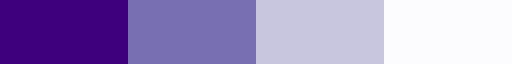

In [18]:
import matplotlib as mpl
#from matplotlib.colors import LinearSegmentedColormap, ListedColormap
cmap = mpl.colormaps['Purples'].resampled(4).reversed()
cmap

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


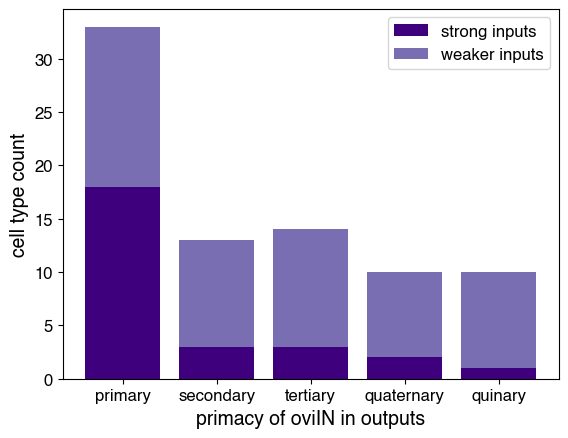

In [19]:
# get hist bins for strong and weak inputs' primacy
strong_counts, strong_bins = np.histogram(strong_testchunk['out_to_ovis_rank'], bins=np.arange(-0.5, 5, 1))
weak_counts, weak_bins = np.histogram(weaker_testchunk['out_to_ovis_rank'], bins=np.arange(-0.5, 5, 1))
better_bins = np.arange(0, 5, 1)

# stacked bar plot
fig, ax = plt.subplots()
ax.bar(better_bins, strong_counts, color=cmap([0]))
ax.bar(better_bins, weak_counts, color=cmap([1]), bottom=strong_counts)
ax.set_ylabel('cell type count')
ax.set_xlabel('primacy of oviIN in outputs')
ax.set_xticks(better_bins)
ax.set_xticklabels(['primary', 'secondary', 'tertiary', 'quaternary', 'quinary'])
ax.legend(['strong inputs', 'weaker inputs'])

plt.savefig('figures/output_primacy_stacked_bars.pdf', format='pdf')
plt.show()

## Old version
I'm trying to figure out the cutoff weights so as to make 3 groups of cell types with approx equal amounts of weight to oviINr. Each concentric ring will represent a weight class and the wedges will be color coded by output primacy.

In [20]:
print("Number of input cell types to oviINr:",len(ovi_inputs))
print("Total weight of oviIN's inputs:",ovi_inputs['weight'].sum())
print("Total weight of oviIN's inputs divided by 3:", ovi_inputs['weight'].sum()/3)
print("Total number of oviIN's inputs with weight < 42:",sum(ovi_inputs[ovi_inputs['weight'] < 42]['weight']))
print("Total number of oviIN's inputs with weight < 42 and >= 120:",sum(ovi_inputs[(ovi_inputs['weight'] < 120) & (ovi_inputs['weight'] >= 42)]['weight']))
print("Total number of oviIN's inputs with weight >= 120:",sum(ovi_inputs[ovi_inputs['weight'] >= 120]['weight']))

Number of input cell types to oviINr: 964
Total weight of oviIN's inputs: 16864
Total weight of oviIN's inputs divided by 3: 5621.333333333333
Total number of oviIN's inputs with weight < 42: 5772
Total number of oviIN's inputs with weight < 42 and >= 120: 5947
Total number of oviIN's inputs with weight >= 120: 5145


In [21]:
# top oviIN inputs
top_ovi_input_types = ovi_inputs[ovi_inputs['weight'] >= 120]

# mid oviIN inputs
mid_ovi_input_types = ovi_inputs[(ovi_inputs['weight'] < 120) & (ovi_inputs['weight'] >= 42)]

# low oviIN inputs
low_ovi_input_types = ovi_inputs[ovi_inputs['weight'] < 42]

In [22]:
# get the rows for strong inputs
top_ovi_input_types_recipro_rank = testchunk[testchunk['type_pre'].isin(top_ovi_input_types['type_pre'])]

# get the rows for medium inputs
mid_ovi_input_types_recipro_rank = testchunk[testchunk['type_pre'].isin(mid_ovi_input_types['type_pre'])]

# get the rows for weak inputs
low_ovi_input_types_recipro_rank = testchunk[testchunk['type_pre'].isin(low_ovi_input_types['type_pre'])]

# print example
#top_ovi_input_types_recipro_rank

In [23]:
# any rank greater than 3 is set to 4
top_ovi_input_types_recipro_rank.loc[top_ovi_input_types_recipro_rank['out_to_ovis_rank'] > 3, 'out_to_ovis_rank'] = 4
mid_ovi_input_types_recipro_rank.loc[mid_ovi_input_types_recipro_rank['out_to_ovis_rank'] > 3, 'out_to_ovis_rank'] = 4
low_ovi_input_types_recipro_rank.loc[low_ovi_input_types_recipro_rank['out_to_ovis_rank'] > 3, 'out_to_ovis_rank'] = 4

In [24]:
# count cell types by primacy
top_primacy_counts = top_ovi_input_types_recipro_rank['out_to_ovis_rank'].value_counts().sort_index()

# count cell types by primacy for medium inputs
mid_primacy_counts = mid_ovi_input_types_recipro_rank['out_to_ovis_rank'].value_counts().sort_index()

# count cell types by primacy for weak inputs
low_primacy_counts = low_ovi_input_types_recipro_rank['out_to_ovis_rank'].value_counts().sort_index()

# print example
top_primacy_counts

out_to_ovis_rank
0    14
1     3
2     2
3     1
4     3
Name: count, dtype: int64

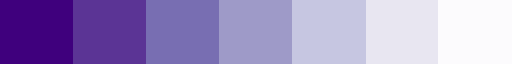

In [25]:
import matplotlib as mpl
#from matplotlib.colors import LinearSegmentedColormap, ListedColormap
cmap = mpl.colormaps['Purples'].resampled(7).reversed()
cmap

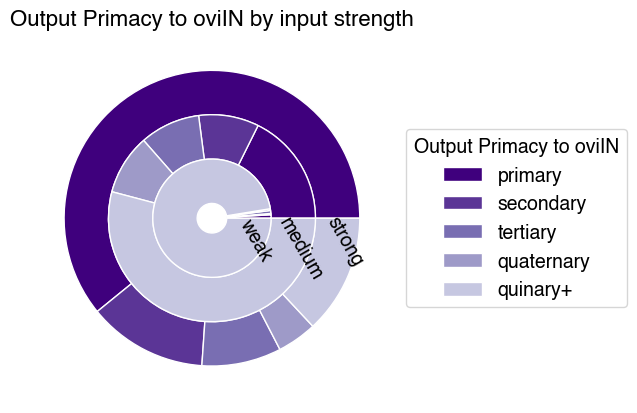

In [26]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [5., 10.]])

#cmap = plt.colormaps["plasma"]
inner_colors = cmap([0, 1, 2, 3, 4, 5, 6])

ax.pie(top_primacy_counts, radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(mid_primacy_counts, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(low_primacy_counts, radius=1-2*size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.text(size, -0.15, 'weak', ha='center', va='center', rotation=-60, fontsize=14)
ax.text(2*size, -0.2, 'medium', ha='center', va='center', rotation=-60, fontsize=14)
ax.text(3*size, -0.15, 'strong', ha='center', va='center', rotation=-60 , fontsize=14)

legend = ax.legend(['primary', 'secondary', 'tertiary', 'quaternary', 'quinary+'], title='Output Primacy to oviIN',loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
legend.get_title().set_fontsize('14')  # Change the font size of the legend title

ax.set_title('Output Primacy to oviIN by input strength', fontsize=16)

plt.show()

In [27]:
# Save the figure
fig.savefig('figures/annulus_output_primacy.svg', dpi=300, bbox_inches='tight')

# Second Figure: Breakdown of known and unknown celltypes in ROI
Only traced, non-cropped neurons are used in this analysis.

In [28]:
# reads all bodyIds in connectome (fetch_synaptic_connections)
ids = mod['id']

# Fetch synaptic locations of all inputs to oviINr (should be on the oviIN itself), takes about 25 secs
roi_info = fetch_synapse_connections(NC(bodyId=ids), NC(bodyId=oviINr_bodyID), batch_size=1000)

  0%|          | 0/18782 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [29]:
roi_info

,bodyId_pre,bodyId_post,roi_pre,roi_post,x_pre,y_pre,z_pre,x_post,y_post,z_post,confidence_pre,confidence_post
0,796889169,423101189,SMP(R),SMP(R),23373,32251,13044,23358,32282,13050,0.990,0.469301
1,796889169,423101189,SMP(R),SMP(R),22244,27537,12483,22226,27529,12490,0.792,0.617000
2,800588608,423101189,SMP(R),SMP(R),22806,30682,12514,22806,30692,12487,0.968,0.673414
3,796755936,423101189,SMP(R),SMP(R),21571,35158,14105,21564,35145,14113,0.983,0.997687
4,796755936,423101189,SMP(R),SMP(R),23040,31908,12238,23021,31907,12242,0.964,0.993469
...,...,...,...,...,...,...,...,...,...,...,...,...
18777,821686394,423101189,IB,IB,24215,16528,21699,24219,16526,21672,0.718,0.985000
18778,821686394,423101189,VES(R),VES(R),23040,22648,28280,23057,22666,28260,0.910,0.534000
18779,821686394,423101189,VES(R),VES(R),23042,22640,28253,23057,22664,28259,0.785,0.465808
18780,821686394,423101189,VES(R),VES(R),23202,23713,28967,23218,23729,28967,0.862,0.898703


In [30]:
# Drop all unnecessary columns
roi_info_small = roi_info[['bodyId_pre', 'roi_pre', 'roi_post']]

# Collapse on roi_post and count the number of synapses in a new column called weight
roi_info_grouped = roi_info_small.groupby(['roi_post', 'bodyId_pre']).size().reset_index(name='weight')

# rename roi_post to roi
roi_info_grouped = roi_info_grouped.rename(columns = {'roi_post':'roi', 'bodyId_pre':'bodyId'})

roi_info_grouped

,roi,bodyId,weight
0,ATL(R),669978138,2
1,ATL(R),790741191,3
2,ATL(R),799521639,1
3,ATL(R),1719953914,1
4,ATL(R),1785931916,1
...,...,...,...
2725,VES(R),5813123585,1
2726,VES(R),5813126031,4
2727,VES(R),5813132515,26
2728,VES(R),5901225755,12


In [31]:
# merge cell type information with roi_info_grouped
inputs_roi = pd.merge(ovi_in_merged[['id','type']], roi_info_grouped, left_on='id', right_on='bodyId', how='inner')
inputs_roi

,id,type,roi,bodyId,weight
0,1003215282,CL229,IB,1003215282,1
1,1005952640,IB058,IB,1005952640,3
2,1006928515,CL300,IB,1006928515,1
3,1007260806,CL301,SPS(R),1007260806,7
4,1008024276,FB5N,CRE(R),1008024276,1
...,...,...,...,...,...
2725,987117151,LAL010,LAL(R),987117151,5
2726,987273073,None,CRE(R),987273073,1
2727,988567837,FB4G,LAL(R),988567837,1
2728,988909130,FB5V,CRE(R),988909130,1


In [32]:
# Filter dataframe to only include the columns needed
inputs_roi_filtered = inputs_roi[['roi','type', 'weight']]

# Drop the 'None' celltype
inputs_roi_filtered = inputs_roi_filtered[inputs_roi_filtered['type']!='None']

# group by roi so that the celltypes are in each roi group that they belong in and sum downstream values
inputs_roi_grouped = inputs_roi_filtered.groupby(['roi', 'type'], as_index=False).sum()
inputs_roi_grouped

,roi,type,weight
0,ATL(R),AOTU024,1
1,ATL(R),IB109,1
2,ATL(R),LC46a,2
3,ATL(R),SMP018_b,3
4,ATL(R),SMP327,3
...,...,...,...
1618,VES(R),oviDNa,1
1619,VES(R),pC1d,21
1620,VES(R),v2LN37,3
1621,VES(R),vpoDN,1


Generic cell type names were determined from Appendix 1 - table 6 of Scheffer, Xu, Januszewski, et al. eLife 2020;9:e57443. DOI: https://doi.org/10.7554/eLife.57443.

In [33]:
# Filter out the unknown celltypes
for i in range(len(inputs_roi_grouped)):
    # get the first 3 letters of the celltype
    celltype = inputs_roi_grouped['type'][i][:3]
    if celltype in ['CRE', 'SMP', 'SIP', 'SLP', 'LAL', 'AOT', 'PLP', 'WED', 'AVL', 'ATL', 'AVL', 'VES', 'SAD']:
        inputs_roi_grouped['type'][i] = ''
    # get the first 2 letters of the celltype
    elif inputs_roi_grouped['type'][i][:2] in [ 'LT', 'CL', 'IB', 'PL', 'PS', 'PV']:
        inputs_roi_grouped['type'][i] = ''
    else:
        continue
inputs_roi_grouped

,roi,type,weight
0,ATL(R),,1
1,ATL(R),,1
2,ATL(R),LC46a,2
3,ATL(R),,3
4,ATL(R),,3
...,...,...,...
1618,VES(R),oviDNa,1
1619,VES(R),pC1d,21
1620,VES(R),v2LN37,3
1621,VES(R),vpoDN,1


Below are the known types that remain.

In [34]:
inputs_roi_grouped['type'].unique()

array(['', 'LC46a', 'FS1A', 'DNp32', 'FB1C', 'FB1H', 'FB4F_a', 'FB4M',
       'FB4P_a', 'FB4Q_b', 'FB5AA', 'FB5C', 'FB5D', 'FB5E', 'FB5F',
       'FB5G', 'FB5K', 'FB5L', 'FB5N', 'FB5O', 'FB5P', 'FB5Q', 'FB5V',
       'FB6N', 'FB6U', 'FB6V', 'FB6W', 'FB6X', 'FC1C', 'FC1D', 'FC1E',
       'FC2A', 'FC2B', 'FC2C', 'FS1B', 'LC33a', 'LHCENT5', 'LHPD2c3',
       'LHPD2c7', 'LHPD5d1', 'LHPV10b1', 'LHPV5e3', 'LHPV8a1', 'MBON04',
       'MBON05', 'MBON12', 'MBON31', 'MBON33', 'MBON35', 'NPFL1-I',
       'OA-VPM3', 'OA-VPM4', 'OA-VUMa7', 'PAM13', 'PAM14', 'PPL102',
       'PPL107', 'PPL108', 'aIPg2', 'aIPg3', 'mALD1', 'OA-ASM2',
       'OA-VUMa6', 'PPL202', 'DNa03', 'FB4G', 'FB4H', 'LC33b', 'LHAV6c1',
       'LHPV3a1', 'M_spPN5t10', 'OA-VUMa1', 'PFL2', 'PFL3', 'PPM1204',
       'PPM1205', 'v2LN37', 'LHAD1b2_a', 'LHPD2a1', 'LHPD2a6', 'LHPD2c1',
       'LHPD2c2', 'LHPD2c6', 'LHPD5f1', 'PAL02', 'aIPg1', 'aIPg4',
       'mALB2', 'pC1d', 'pC1e', 'FS3', 'MBON01', 'PAL03', 'PAM01_b',
       'oviIN', '5-

In [35]:
#map roi to super roi
roi_super_dict = {'SMP(R)': 'SNP', 'SMP(L)': 'SNP', 'SIP(R)': 'SNP', 'SIP(L)': 'SNP', 'VES(R)': 'VMNP', 'LAL(R)': 'LX', 'IB': 'INP', 'CRE(R)': 'INP', 'CRE(L)': 'INP', 'ATL(R)': 'INP', 'ATL(L)': 'AL', 'VES(L)': 'VMNP', 'GOR(R)': 'VMNP', 'GOR(L)': 'VMNP', 'SPS(R)': 'VMNP', 'SPS(L)': 'VMNP', 'FLA(R)': 'PENP', 'FLA(L)': 'PENP', 'PENP': 'PENP', 'AL': 'AL', 'PENP': 'PENP', 'CAN(R)': 'PENP'}
inputs_roi_grouped['super_roi'] = inputs_roi_grouped['roi'].map(roi_super_dict)

inputs_roi_grouped

,roi,type,weight,super_roi
0,ATL(R),,1,INP
1,ATL(R),,1,INP
2,ATL(R),LC46a,2,INP
3,ATL(R),,3,INP
4,ATL(R),,3,INP
...,...,...,...,...
1618,VES(R),oviDNa,1,VMNP
1619,VES(R),pC1d,21,VMNP
1620,VES(R),v2LN37,3,VMNP
1621,VES(R),vpoDN,1,VMNP


The inner layer of the plot will have the super ROI categories displayed relative to their weight

In [36]:
# Check unique Roi 
inputs_roi_grouped['super_roi'].unique()

array(['INP', 'PENP', 'VMNP', 'LX', 'SNP'], dtype=object)

In [37]:
# inner layer sums the super_roi values into a total weight column
inner_layer = inputs_roi_grouped[['super_roi','weight']].groupby(['super_roi'], as_index=False).sum()

# map color to super_roi
inner_layer['color'] = 'darkturquoise'
inner_layer

,super_roi,weight,color
0,INP,3271,darkturquoise
1,LX,1405,darkturquoise
2,PENP,7,darkturquoise
3,SNP,11206,darkturquoise
4,VMNP,963,darkturquoise


The outer layer will have the weights split between known and unknown celltypes within the super ROI groupings. This will tell us how much is still unknown about these areas that the oviIN is connected to.

In [38]:
# Outer layer only shows to groups for each super_roi, known and unknown celltypes
# this means each celltypes that has a name will be grouped together and all the blank celltypes will be grouped together
outer_layer = inputs_roi_grouped.copy()
for i in range(len(outer_layer)):
    if outer_layer['type'][i] == '':
        outer_layer['type'][i] = 'Unknown'
    else:
        outer_layer['type'][i] = 'Known'

# group by super_roi and celltype
outer_layer = outer_layer.groupby(['super_roi', 'type'], as_index=False).sum()

# Drop roi column
outer_layer = outer_layer.drop(columns=['roi'])

# map color to super_roi
outer_layer['color'] = 'orangered'
# change the color to "light"+ color for the unknown celltypes and 'dark'+ color for the known celltypes
for i in range(len(outer_layer)):
    if outer_layer['type'][i] == 'Unknown':
        outer_layer['color'][i] = 'darkorange'
outer_layer

,super_roi,type,weight,color
0,INP,Known,723,orangered
1,INP,Unknown,2548,darkorange
2,LX,Known,106,orangered
3,LX,Unknown,1299,darkorange
4,PENP,Unknown,7,darkorange
5,SNP,Known,2271,orangered
6,SNP,Unknown,8935,darkorange
7,VMNP,Known,57,orangered
8,VMNP,Unknown,906,darkorange


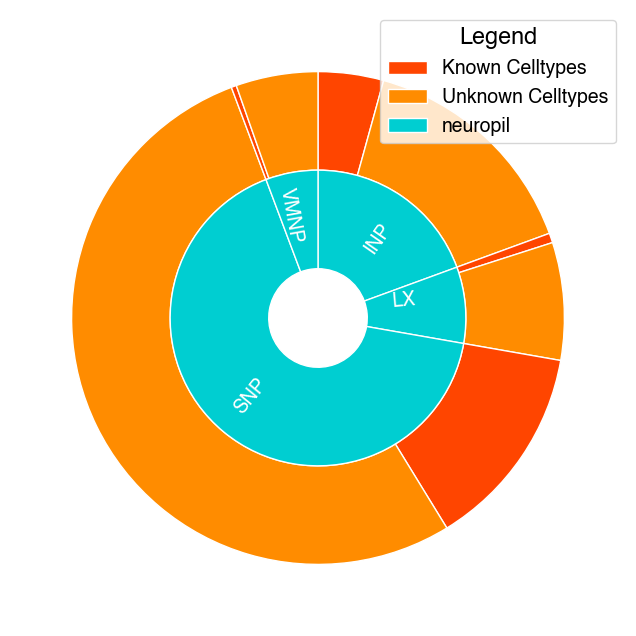

In [40]:
# Filter out the roi that have less than 10 synapses
inner_layer = inner_layer[inner_layer['weight'] >= 10]
outer_layer = outer_layer[outer_layer['weight'] >= 10]

# create a double layered pie plot with the roi as the inner layer and the celltypes as the outer layer
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the outer layer of the pie plot
wedges1, _ = ax.pie(outer_layer['weight'],  colors=outer_layer['color'],radius=1, rotatelabels=True,  startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'))

# Plot the inner layer of the pie plot
wedges2, _ = ax.pie(inner_layer['weight'], labels=inner_layer['super_roi'], colors= inner_layer['color'],labeldistance=0.5, rotatelabels= True, radius=1-0.4, startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'), textprops={'fontsize': 14, 'color': 'white'})
    
# legend with orangered, darkorange, darkturquoise corresponding to known celltypes, unknown celltypes, and roi respectively
legend_elements = [mpl.patches.Patch(facecolor='orangered', edgecolor='white', label='Known Celltypes'), mpl.patches.Patch(facecolor='darkorange', edgecolor='white', label='Unknown Celltypes'), mpl.patches.Patch(facecolor='darkturquoise', edgecolor='white', label='neuropil')]
ax.legend(handles=legend_elements, loc='upper right', title='Legend', title_fontsize='large', fontsize='medium')

#fig.suptitle("Cell Type Breakdown by ROI")

In [129]:
# Save the figure
fig.savefig('figures/breakdown_knownVSunknown.svg', dpi=300, bbox_inches='tight')

# Who makes strong recurrent connections with the oviINr?

In [48]:
# load the primacy data
primacy = pd.read_csv('data/output_to_oviIN_primacy.csv', index_col=0)


# pull the types in the best rank
primaries = primacy[primacy['out_to_ovis_rank'] == 0]
strong_primaries = primaries[primaries['weight'] > 100].reset_index(drop=True)
strong_primaries

,type_pre,weight,out_to_ovis_weight,out_to_ovis_rank
0,FS1A,892,1589,0
1,IB017,370,562,0
2,SMP052,361,614,0
3,SMP544,259,358,0
4,LAL134,247,358,0
5,SMP550,234,445,0
6,SMP566,203,242,0
7,SMP237,163,337,0
8,SMP551,159,293,0
9,SMP051,157,273,0


In [49]:
prims_to_oviINr = fetch_simple_connections(oviINr_bodyID, strong_primaries['type_pre'])
prim_types_to_oviINr = prims_to_oviINr[['type_post','weight']].groupby('type_post').sum('weight').reset_index()
prim_types_to_oviINr.sort_values('weight', ascending=False)

,type_post,weight
13,SMP550,375
9,SMP237,225
1,IB017,194
3,SMP007,185
10,SMP386,176
7,SMP153,167
8,SMP179,92
17,pC1e,53
4,SMP051,44
6,SMP112,43


In [50]:
# ratio of weights
ratio_recurr = prim_types_to_oviINr.merge(strong_primaries[['type_pre','weight']], left_on='type_post', right_on='type_pre', suffixes=('_from_oviINr','_to_oviINr'))
ratio_recurr['ratio'] = ratio_recurr['weight_from_oviINr'] / ratio_recurr['weight_to_oviINr']
ratio_recurr.sort_values('ratio', ascending=False)


,type_post,weight_from_oviINr,type_pre,weight_to_oviINr,ratio
3,SMP007,185,SMP007,109,1.697248
13,SMP550,375,SMP550,234,1.602564
9,SMP237,225,SMP237,163,1.380368
7,SMP153,167,SMP153,137,1.218978
10,SMP386,176,SMP386,156,1.128205
8,SMP179,92,SMP179,104,0.884615
1,IB017,194,IB017,370,0.524324
17,pC1e,53,pC1e,148,0.358108
11,SMP520,42,SMP520,125,0.336000
6,SMP112,43,SMP112,140,0.307143


In [51]:
# better way to present ratios
ratio_recurr['recipro_index'] = (abs(ratio_recurr['ratio'] - 1) + abs(ratio_recurr['weight_to_oviINr'] / ratio_recurr['weight_from_oviINr'] - 1))/2
ratio_recurr.sort_values('recipro_index', ascending=True)

,type_post,weight_from_oviINr,type_pre,weight_to_oviINr,ratio,recipro_index
10,SMP386,176,SMP386,156,1.128205,0.120921
8,SMP179,92,SMP179,104,0.884615,0.122910
7,SMP153,167,SMP153,137,1.218978,0.199309
9,SMP237,225,SMP237,163,1.380368,0.327962
13,SMP550,375,SMP550,234,1.602564,0.489282
3,SMP007,185,SMP007,109,1.697248,0.554029
1,IB017,194,IB017,370,0.524324,0.691446
17,pC1e,53,pC1e,148,0.358108,1.217172
11,SMP520,42,SMP520,125,0.336000,1.320095
6,SMP112,43,SMP112,140,0.307143,1.474336


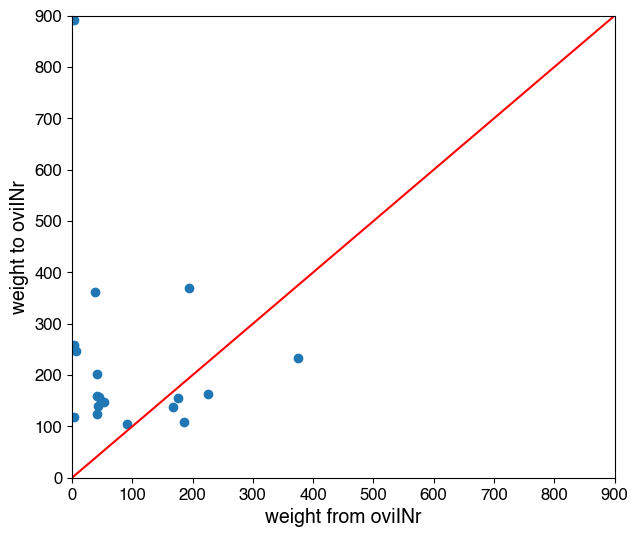

In [52]:
# make a plot of weights against weights
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(ratio_recurr['weight_from_oviINr'], ratio_recurr['weight_to_oviINr'])
ax.set_xlabel('weight from oviINr')
ax.set_ylabel('weight to oviINr')
ax.set_xlim(0, 900)
ax.set_ylim(0, 900)

# plot a diagonal line
x = np.linspace(0, 900, 100)
y = x
ax.plot(x, y, color='red')

In [53]:
# get oviINr connections in and out
ovi_inputs = fetch_simple_connections(None,oviINr_bodyID)
ovi_outputs = fetch_simple_connections(oviINr_bodyID,None)

In [54]:
# collapse by cell type and sum the weights
ovi_inputs = ovi_inputs[['type_pre','weight']].groupby('type_pre').sum('weight').reset_index()
ovi_outputs = ovi_outputs[['type_post','weight']].groupby('type_post').sum('weight').reset_index()

In [55]:
# merge the two dataframes with outer join
in_out_weights_bytype = ovi_inputs.merge(ovi_outputs, left_on='type_pre', right_on='type_post', how='outer', suffixes=('_to_ovi','_from_ovi')).sort_values('weight_to_ovi', ascending=False).reset_index(drop=True)

# replace NaNs with 0
in_out_weights_bytype = in_out_weights_bytype.fillna(0)
in_out_weights_bytype

,type_pre,weight_to_ovi,type_post,weight_from_ovi
0,FS1A,892.0,FS1A,4.0
1,IB017,370.0,IB017,194.0
2,SMP052,361.0,SMP052,38.0
3,SMP176,299.0,SMP176,11.0
4,FC2B,290.0,FC2B,137.0
...,...,...,...,...
1374,0,0.0,VES082,1.0
1375,0,0.0,aMe13,1.0
1376,0,0.0,aSP-f1A,1.0
1377,0,0.0,aSP-f1B,2.0


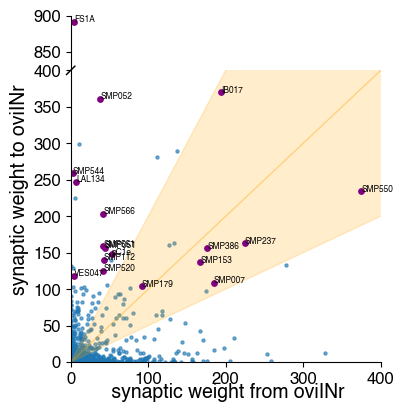

In [56]:
from brokenaxes import brokenaxes

# make a plot of weights against weights
fig = plt.figure(figsize=(4,4.5))

ax = brokenaxes(ylims=((0, 400), (825, 900)), hspace=.0)

ax.scatter(in_out_weights_bytype['weight_from_ovi'], in_out_weights_bytype['weight_to_ovi'],  s=5, alpha=0.6)

ax.set_xlabel(' synaptic weight from oviINr')
ax.set_ylabel('synaptic weight to oviINr')
ax.set_xlim(0, 400)
#ax.set_ylim(0, 900)

# plot a diagonal line
x = np.linspace(0, 900, 100)
y = x
#ax.plot(x, y, color='red')

# recurrence zone
y_hi = x*2
y_lo = x*0.5

y_hi1 = y_hi*2
y_lo1 = y_lo*0.5

#ax.fill_between(x, y, y_hi1, color='orange', alpha=0.2)
#ax.fill_between(x, y_lo1, y, color='orange', alpha=0.2)

ax.fill_between(x, y, y_hi, color='orange', alpha=0.2)
ax.fill_between(x, y_lo, y, color='orange', alpha=0.2)

# add the strong primaries to the mix
ax.scatter(ratio_recurr['weight_from_oviINr'], ratio_recurr['weight_to_oviINr'], color='purple', s=15)

# annotate the points with cell type names
for i, txt in enumerate(ratio_recurr['type_pre']):
    ax.annotate(txt, (ratio_recurr['weight_from_oviINr'][i], ratio_recurr['weight_to_oviINr'][i]), fontsize=6)



In [57]:
# save as pdf
fig.savefig('figures/weights_to_from_oviINr.pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
